In [ ]:
import gdown
gdown.download_folder("https://drive.google.com/drive/folders/1c5-0YwnoJx8NS6CV2f-NoTHR__BdkNqw", quiet=False)

In [1]:
# MOHSEN
import os
from dotenv import load_dotenv
from huggingface_hub import login

load_dotenv()
login(os.environ["HF_TOKEN"])

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/mohsenfayyaz/.cache/huggingface/token
Login successful


# Load Corpus: 
ReDocRED (test, val, train) + DocRED (train_distant)

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)

def load_data():
    splits = {
        'test': 'test_revised.json',
        'validation': 'dev_revised.json',
        'train': 'train_revised.json',
    }
    raw_df = pd.DataFrame()
    for split in splits.keys():
        new_df = pd.read_json("hf://datasets/tonytan48/Re-DocRED/" + splits[split])
        new_df["split"] = split
        raw_df = pd.concat([raw_df, new_df])

    new_df = pd.read_json("./DocRED/train_distant.json")
    new_df["split"] = "train_distant"
    raw_df = pd.concat([raw_df, new_df])
    return raw_df

raw_df = load_data()
print(raw_df["split"].value_counts())
raw_df

split
train_distant    101873
train              3053
test                500
validation          500
Name: count, dtype: int64


,title,vertexSet,labels,sents,split
0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test
1,Vladimir Mitrofanovich Orlov,"[[{'name': 'Vladimir Mitrofanovich Orlov', 'pos': [0, 3], 'sent_id': 0, 'type': 'PER', 'global_p...","[{'r': 'P69', 'h': 0, 't': 9, 'evidence': [1]}, {'r': 'P570', 'h': 0, 't': 25, 'evidence': [0, 7...","[[Vladimir, Mitrofanovich, Orlov, (, ), (, July, 15, ,, 1895, -, July, 28, ,, 1938, ), was, a, R...",test
2,Ecuadorian Constituent Assembly,"[[{'name': 'Ecuadorian Constituent Assembly', 'pos': [1, 4], 'sent_id': 0, 'type': 'ORG', 'globa...","[{'r': 'P17', 'h': 0, 't': 3, 'evidence': [0]}, {'r': 'P571', 'h': 0, 't': 1, 'evidence': [0]}, ...","[[The, Ecuadorian, Constituent, Assembly, was, a, 2007, –, 2008, constitutional, assembly, in, E...",test
3,Bantustan,"[[{'name': 'Bantustan', 'pos': [1, 2], 'sent_id': 0, 'type': 'LOC', 'global_pos': [1, 1], 'index...","[{'r': 'P1366', 'h': 3, 't': 4, 'evidence': [0]}, {'r': 'P1365', 'h': 4, 't': 3, 'evidence': [0]...","[[A, Bantustan, (, also, known, as, Bantu, homeland, ,, black, homeland, ,, black, state, or, si...",test
4,Long Hard Road Out of Hell,"[[{'name': 'Long Hard Road Out of Hell', 'pos': [1, 7], 'sent_id': 0, 'type': 'MISC', 'global_po...","[{'r': 'P162', 'h': 0, 't': 7, 'evidence': [0, 1, 5]}, {'r': 'P162', 'h': 0, 't': 2, 'evidence':...","[["", Long, Hard, Road, Out, of, Hell, "", is, a, song, by, American, rock, band, Marilyn, Manson,...",test
...,...,...,...,...,...
101868,Last Flag Flying,"[[{'pos': [0, 3], 'type': 'MISC', 'sent_id': 0, 'name': 'Last Flag Flying'}, {'pos': [3, 6], 'ty...","[{'h': 0, 't': 1, 'r': 'P577', 'evidence': []}, {'h': 0, 't': 3, 'r': 'P57', 'evidence': []}, {'...","[[Last, Flag, Flying, is, a, 2017, American, comedy, -, drama, film, directed, by, Richard, Link...",train_distant
101869,Hillman Minx,"[[{'pos': [1, 3], 'type': 'MISC', 'sent_id': 0, 'name': 'Hillman Minx'}], [{'pos': [11, 12], 'ty...","[{'h': 2, 't': 3, 'r': 'P576', 'evidence': []}, {'h': 2, 't': 25, 'r': 'P156', 'evidence': []}, ...","[[The, Hillman, Minx, was, a, mid, -, sized, family, car, that, British, car, maker, Hillman, pr...",train_distant
101870,Knute Nelson,"[[{'pos': [0, 2], 'type': 'PER', 'sent_id': 0, 'name': 'Knute Nelson'}], [{'pos': [4, 6], 'type'...","[{'h': 0, 't': 2, 'r': 'P569', 'evidence': []}, {'h': 0, 't': 3, 'r': 'P570', 'evidence': []}, {...","[[Knute, Nelson, (, born, Knud, Evanger, ;, February, 2, ,, 1843, April, 28, ,, 1923, ), was, an...",train_distant
101871,Who Do You Think You Are? (book),"[[{'pos': [0, 6], 'type': 'MISC', 'sent_id': 0, 'name': 'Who Do You Think You Are'}], [{'pos': [...","[{'h': 1, 't': 3, 'r': 'P166', 'evidence': []}, {'h': 1, 't': 7, 'r': 'P27', 'evidence': []}, {'...","[[Who, Do, You, Think, You, Are, ?], [is, a, book, of, short, stories, by, Alice, Munro, ,, reci...",train_distant


In [3]:
# UPLOAD ON HF
raw_df.to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/corpus_all.pkl")
raw_df.to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/corpus_all.pkl.gz")

No files have been modified since last commit. Skipping to prevent empty commit.


hffs-9n6mkjo3:   0%|          | 0.00/93.7M [00:00<?, ?B/s]

# Make Queries

In [15]:
import numpy as np
from tqdm.auto import tqdm


def generate_query_question(head_entity, tail_entity, relation_type):
    relation_mapping = {
        'P6': f'Who is the head of government of {head_entity}?',                 # Invertible
        'P17': f'Which country is {head_entity} associated with?',
        'P19': f'Where was {head_entity} born?',
        'P20': f'Where did {head_entity} die?',
        'P22': f'Who is the father of {head_entity}?',
        'P25': f'Who is the mother of {head_entity}?',
        'P26': f'Who is the spouse of {head_entity}?',                            # Invertible
        'P27': f'Which country is {head_entity} a citizen of?',                   # Could have multiple answers
        'P30': f'Which continent is {head_entity} part of?',
        'P31': f'What is {head_entity} an instance of?',                          # Could have multiple answers
        'P35': f'Who is the head of state of {head_entity}?',                     # Invertible
        'P36': f'What is the capital of {head_entity}?',                          # Invertible
        'P37': f'What is the official language of {head_entity}?',
        'P39': f'What position did {head_entity} hold?',                          # Could have multiple answers
        'P40': f'Who are the children of {head_entity}?',                         # Could have multiple answers
        'P50': f'Who is the author of {head_entity}?',                            # Could have multiple answers (not likely in DocRED)
        'P54': f'Which sports team is {head_entity} a member of?',                # Could have multiple answers (not likely in DocRED)
        'P57': f'Who directed {head_entity}?',                                    # Could have multiple answers (not likely in DocRED)
        'P58': f'Who wrote the screenplay for {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P69': f'Where was {head_entity} educated?',                              # Could have multiple answers
        'P86': f'Who composed the music for {head_entity}?',
        'P102': f'Which political party is {head_entity} a member of?',           # Could have multiple answers (not likely in DocRED)
        'P108': f'Who is the employer of {head_entity}?',
        'P112': f'Who founded {head_entity}?',                                    # Could have multiple answers, Invertible
        'P118': f'Which league is {head_entity} part of?',
        'P123': f'Who is the publisher of {head_entity}?',
        'P127': f'Who owns {head_entity}?',                                       # Could have multiple answers
        'P131': f'Which administrative territorial entity is {head_entity} located in?', # Could have multiple answers
        'P136': f'What genre does {head_entity} belong to?',                      # Could have multiple answers (not likely in DocRED)
        'P137': f'Who operates {head_entity}?',
        'P140': f'What is the religion of {head_entity}?',                        # Could have multiple answers (not likely in DocRED)
        # 'P150': f'What administrative territorial entity is contained within {head_entity}?', # Extreme Many-to-many (DISCARD THIS TYPE)
        'P155': f'What precedes {head_entity}?',
        'P156': f'What follows {head_entity}?',
        'P159': f'Where is the headquarters of {head_entity} located?',
        'P161': f'Who is a cast member of {head_entity}?',
        'P162': f'Who produced {head_entity}?',                                   # Could have multiple answers
        'P166': f'What award did {head_entity} receive?',                         # Could have multiple answers (not likely in DocRED)
        'P170': f'Who created {head_entity}?',                                    # Could have multiple answers (not likely in DocRED)
        'P171': f'What is the parent taxon of {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P172': f'What is the ethnic group of {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P175': f'Who performed {head_entity}?',
        'P176': f'Who manufactured {head_entity}?',
        'P178': f'Who developed {head_entity}?',
        'P179': f'What series is {head_entity} part of?',
        'P190': f'What is the sister city of {head_entity}?',
        'P194': f'What is the legislative body of {head_entity}?',
        'P205': f'What country is the basin of {head_entity}?',
        'P206': f'Where is {head_entity} located in or next to a body of water?',
        'P241': f'Which military branch is {head_entity} part of?',
        'P264': f'Which record label is {head_entity} associated with?',
        'P272': f'Which production company produced {head_entity}?',
        'P276': f'Where is {head_entity} located?',
        'P279': f'What is {head_entity} a subclass of?',
        'P355': f'What is the subsidiary of {head_entity}?',                      # Could have multiple answers
        'P361': f'What is {head_entity} a part of?',
        'P364': f'What is the original language of {head_entity}?',
        'P400': f'What platform is {head_entity} available on?',                  # Could have multiple answers
        'P403': f'What is the mouth of the watercourse of {head_entity}?',
        'P449': f'What is the original network of {head_entity}?',
        'P463': f'Which organization is {head_entity} a member of?',
        'P488': f'Who is the chairperson of {head_entity}?',
        'P495': f'What is the country of origin of {head_entity}?',
        'P527': f'What are the components of {head_entity}?',                     # Could have multiple answers
        'P551': f'Where is the residence of {head_entity}?',
        'P569': f'When was {head_entity} born?',
        'P570': f'When did {head_entity} die?',
        'P571': f'When was {head_entity} founded?',
        'P576': f'When was {head_entity} dissolved or demolished?',
        'P577': f'When was {head_entity} published?',
        'P580': f'When did {head_entity} start?',
        'P582': f'When did {head_entity} end?',
        'P585': f'When did {head_entity} occur?',
        'P607': f'What conflict was {head_entity} part of?',                      # Could have multiple answers
        'P674': f'Who are the characters in {head_entity}?',                      # Could have multiple answers
        'P676': f'Who wrote the lyrics for {head_entity}?',                       # Could have multiple answers
        'P706': f'Where is {head_entity} located on a terrain feature?',
        # 'P710': f'Who participated in {head_entity}?',                            # Extreme Many-to-many (DISCARD THIS TYPE)
        'P737': f'Who influenced {head_entity}?',
        'P740': f'Where was {head_entity} formed?',
        'P749': f'What is the parent organization of {head_entity}?',
        'P800': f'What is a notable work of {head_entity}?',
        'P807': f'What is {head_entity} separated from?',
        'P840': f'Where does the narrative of {head_entity} take place?',
        'P937': f'Where did {head_entity} work?',
        'P1001': f'Which jurisdiction does {head_entity} apply to?',
        'P1056': f'What does {head_entity} produce?',
        'P1198': f'What is the unemployment rate of {head_entity}?',
        'P1336': f'What territory is claimed by {head_entity}?',
        'P1344': f'What was {head_entity} a participant of?',
        'P1365': f'What does {head_entity} replace?',
        'P1366': f'What replaced {head_entity}?',
        'P1376': f'What is {head_entity} the capital of?',                        # BEWARE OF THE DUPLICATION FOR FILTERING (FACT P36 is the same as this one) FIXED
        'P1412': f'What languages are spoken, written, or signed by {head_entity}?',    # Could have multiple answers
        'P1441': f'In what work does {head_entity} appear?',
        'P3373': f'Who is the sibling of {head_entity}?'                          # Could have multiple answers, Invertible (based on each sibling)
    }
    return relation_mapping[relation_type]

DISCARDED_RELATIONS = ['P150', 'P710']

def create_query_dataset(redocred_data):
    queries = []
    duplicate_head_relation_to_titles = {}
    import json
    with open("./DocRED/rel_info.json") as fd:
        rel_info = json.load(fd)

    id_counter = {split: 0 for split in redocred_data['split'].unique()}
    for row in tqdm(redocred_data.to_dict(orient='records'), total=len(redocred_data), desc="Generating Queries"):
        sents = row['sents']
        # context = " ".join([" ".join(sent) for sent in sents])
        vertex_set = row['vertexSet']

        for label_idx, relation in enumerate(row['labels']):
            head_idx = relation['h']
            tail_idx = relation['t']
            relation_type = relation['r']
            if relation_type in DISCARDED_RELATIONS:
                continue

            head_entity = vertex_set[head_idx]
            tail_entity = vertex_set[tail_idx]

            ### Head and Tail Names
            head_entity_names = {entity['name'] for entity in head_entity}
            tail_entity_names = {entity['name'] for entity in tail_entity}
            head_entity_longest_name = max(head_entity_names, key=len)
            tail_entity_longest_name = max(tail_entity_names, key=len)

            ### Generate Questions
            query_question = generate_query_question(head_entity_longest_name, tail_entity_longest_name, relation_type)

            ### Filter Evidence Sentences
            evidence_sent_ids = relation['evidence']
            evidence_sents = [sents[sent_id] for sent_id in evidence_sent_ids]
            head_entity_in_evidence = [entity for entity in head_entity if entity['sent_id'] in evidence_sent_ids]
            tail_entity_in_evidence = [entity for entity in tail_entity if entity['sent_id'] in evidence_sent_ids]

            ### Duplicates
            for head_name in head_entity_names:
                if (head_name, relation_type) not in duplicate_head_relation_to_titles:
                    duplicate_head_relation_to_titles[(head_name, relation_type)] = set([row['title']])
                else:
                    duplicate_head_relation_to_titles[(head_name, relation_type)].add(row['title'])

            query = {
                'id': f"{row['split']}{id_counter[row['split']]}",
                **row,
                # 'title': row['title'],
                # 'vertexSet': row['vertexSet'],
                # 'labels': row['labels'],
                # 'sents': row['sents'],

                'label': relation,
                'label_idx': label_idx,
                # 'context': context,

                'head_entity': head_entity,
                'tail_entity': tail_entity,
                'head_entity_names': set(head_entity_names),
                'tail_entity_names': set(tail_entity_names),
                'head_entity_longest_name': head_entity_longest_name,
                'tail_entity_longest_name': tail_entity_longest_name,

                'head_entity_types': {e['type'] for e in head_entity},
                'tail_entity_types': {e['type'] for e in tail_entity},

                'evidence_sent_ids': evidence_sent_ids,
                'evidence_sents': evidence_sents,
                'head_entity_in_evidence': head_entity_in_evidence,
                'tail_entity_in_evidence': tail_entity_in_evidence,

                'relation': relation_type,
                'relation_name': rel_info[relation_type],
                'query_question': query_question
            }
            queries.append(query)
            id_counter[row['split']] += 1

    ### Find Duplicates (head, relation) with different titles
    def find_duplicate_titles(title, head_names, relation):
        duplicate_titles_row = list()
        for head_name in head_names:
            if (head_name, relation) in duplicate_head_relation_to_titles:
                duplicate_titles_row.extend(duplicate_head_relation_to_titles[(head_name, relation)])
        duplicate_titles_row = set(duplicate_titles_row)
        duplicate_titles_row.remove(title)
        return duplicate_titles_row

    for q in tqdm(queries):
        duplicate_titles = find_duplicate_titles(q["title"], q["head_entity_names"], q["relation"])
        q["duplicate_titles_len"] = len(duplicate_titles)
        q["duplicate_titles"] = set(list(duplicate_titles)[:10])

    query_df = pd.DataFrame(queries)
    return query_df

query_df = create_query_dataset(raw_df)

Generating Queries:   0%|          | 0/105926 [00:00<?, ?it/s]

  0%|          | 0/1552195 [00:00<?, ?it/s]

In [18]:
# UPLOAD
query_df.to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_all.pkl")
query_df.to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_all.pkl.gz")
query_df[query_df["split"] == "test"].to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_test.pkl")
query_df[query_df["split"] == "test"].to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_test.pkl.gz")
query_df[query_df["split"] == "validation"].to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_validation.pkl")
query_df[query_df["split"] == "validation"].to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_validation.pkl.gz")

No files have been modified since last commit. Skipping to prevent empty commit.


hffs-ktffa3lg:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

hffs-kmihldqg:   0%|          | 0.00/6.86M [00:00<?, ?B/s]

hffs-7qvb2z0q:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

In [17]:
query_df

,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles
0,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index'...","{Loud, Loud Tour}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in, the, Americas, and, Europe, ,, the, tour, was, la...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index'...",P577,publication date,When was Loud Tour published?,0,{}
1,test1,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test,"{'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1]}",1,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'name': 'Rihanna', 'pos': [3, 4], 'sent_id': 4, 'type': 'PER', 'global_pos': [93, 93], 'index'...","{Loud, Loud Tour}",{Rihanna},Loud Tour,Rihanna,{MISC},{PER},"[0, 1]","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'name': 'Rihanna', 'pos': [18, 19], 'sent_id': 1, 'type': 'PER', 'global_pos': [36, 36], 'inde...",P175,performer,Who performed Loud Tour?,0,{}
2,test2,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test,"{'r': 'P131', 'h': 10, 't': 8, 'evidence': [4]}",2,"[{'sent_id': 4, 'type': 'LOC', 'pos': [11, 14], 'name': 'The O2 Arena', 'global_pos': [101, 101]...","[{'name': 'London', 'pos': [1, 2], 'sent_id': 4, 'type': 'LOC', 'global_pos': [91, 91], 'index':...",{The O2 Arena},{London},The O2 Arena,London,{LOC},{LOC},[4],"[[In, London, ,, Rihanna, played, a, record, breaking, 10, dates, at, The, O2, Arena, .]]","[{'sent_id': 4, 'type': 'LOC', 'pos': [11, 14], 'name': 'The O2 Arena', 'global_pos': [101, 101]...","[{'name': 'London', 'pos': [1, 2], 'sent_id': 4, 'type': 'LOC', 'global_pos': [91, 91], 'index':...",P131,located in the administrative territorial entity,Which administrative territorial entity is The O2 Arena located in?,0,{}
3,test3,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test,"{'r': 'P17', 'h': 8, 't': 7, 'evidence': [3, 4]}",3,"[{'name': 'London', 'pos': [1, 2], 'sent_id': 4, 'type': 'LOC', 'global_pos': [91, 91], 'index':...","[{'name': 'United Kingdom', 'pos': [18, 20], 'sent_id': 3, 'type': 'LOC', 

# Clean for beir

In [23]:
import pandas as pd

query_df = pd.read_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_test.pkl.gz")


16452
9764 0.5934840748845125
3890 0.39840229414174516


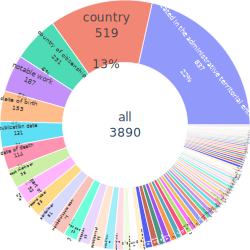

In [24]:
print(len(query_df))
# query_df[["relation_name", "query_question", "duplicate_titles_len", "duplicate_titles"]].sort_values(by="duplicate_titles_len", ascending=False).drop_duplicates(subset=["query_question"]).head(20)
query_df_drop_duplicates = query_df[query_df["duplicate_titles_len"] == 0]
print(len(query_df_drop_duplicates), len(query_df_drop_duplicates) / len(query_df))
query_df_drop_duplicates_with_evidence = query_df_drop_duplicates[query_df_drop_duplicates["evidence_sent_ids"].apply(len) > 0]
print(len(query_df_drop_duplicates_with_evidence), len(query_df_drop_duplicates_with_evidence) / len(query_df_drop_duplicates))

import plotly.express as px

dfc = query_df_drop_duplicates_with_evidence.copy()
fig = px.sunburst(dfc, path=[px.Constant("all"), 'relation_name'], width=250, height=250)
fig.update_traces(textinfo='label+percent entry+value')
fig.update_layout(margin={'t':0,'l':0,'b':0,'r':0})
fig.show("svg")

In [25]:
query_df_drop_duplicates_with_evidence.head(1)

,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles
0,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, r...",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index'...","{Loud, Loud Tour}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in, the, Americas, and, Europe, ,, the, tour, was, la...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index'...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index'...",P577,publication date,When was Loud Tour published?,0,{}


In [26]:
query_df_drop_duplicates_with_evidence.to_pickle(f"hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_test_clean.pkl")

hffs-5gs1yqho:   0%|          | 0.00/3.62M [00:00<?, ?B/s]